## Circuit 1

In [6]:
import matplotlib.pyplot as plt
import scienceplots
import numpy as np

In [85]:
#circuit 1
V = np.array([6.309, 6.305, 6.311, 6.318])
dV = np.array([0.001])
I = np.array([61.72, 28.425, 13.445, 2.341])
dI = np.array([0.007, 0.007, 0.007, 0.005])

In [87]:
#circuit 2
V = np.array([6.158, 6.236, 6.276, 6.306])
dV = np.array([0.001])
I = np.array([61.53, 28.398, 13.437, 2.339])
dI = np.array([0.007, 0.007, 0.007, 0.005])

In [26]:
plt.style.use('science')
plt.rcParams['figure.dpi']=220

In [76]:
coefficients = np.polyfit(I, V, 1)
poly = np.poly1d(coefficients)

In [96]:
def linear_fit(x, y, xerr, yerr):
    delta = len(x) * sum(x**2) - sum(x)**2
    m = (len(x) * sum(x*y) - sum(x) * sum(y)) / delta
    b = (sum(y) - m * sum(x)) / len(x)
    
    y_var_2 = ((1/ (len(x) - 2)) * sum((y - (b + m * x))**2))
    m_std = (y_var_2 * (len(x) / delta))**0.5
    b_std = (y_var_2 * (sum(x**2) / delta))**0.5
    
    r_2 = 1 - (len(x)-2) * y_var_2 / sum((y - np.mean(y))**2)
    
    chi_2 = sum((( y - (b + m * x)))**2 / (b + m * x))
    
    x += xerr
    y += yerr
    delta_2 = len(x) * sum(x**2) - sum(x)**2
    m_2 = (len(x) * sum(x*y) - sum(x) * sum(y)) / delta_2
    b_2 = (sum(y) - m * sum(x)) / len(x)
    
    x -= xerr * 2
    y -= yerr * 2
    delta_3 = len(x) * sum(x**2) - sum(x)**2
    m_3 = (len(x) * sum(x*y) - sum(x) * sum(y)) / delta_3
    b_3 = (sum(y) - m * sum(x)) / len(x)
    
    m_err = abs(m_3 - m_2) / 2
    b_err = abs(b_3 - b_2) / 2
    
    m_err2 = np.mean(np.sqrt((np.sqrt(1 / x) * np.mean(yerr))**2 + (np.sqrt(y) * np.mean(xerr))**2))
    
    
    return (m, b, m_err, b_err, r_2, chi_2, m_std, b_std, m_err2)

In [97]:
linear_fit(I, V, dI, dV)

(-0.0024906384561250356,
 6.306769044391667,
 5.840582790453061e-08,
 0.0010161891499640419,
 0.9987181406249553,
 2.531611005957942e-06,
 6.30949229574292e-05,
 0.0021797449619682927,
 0.016241105975762754)

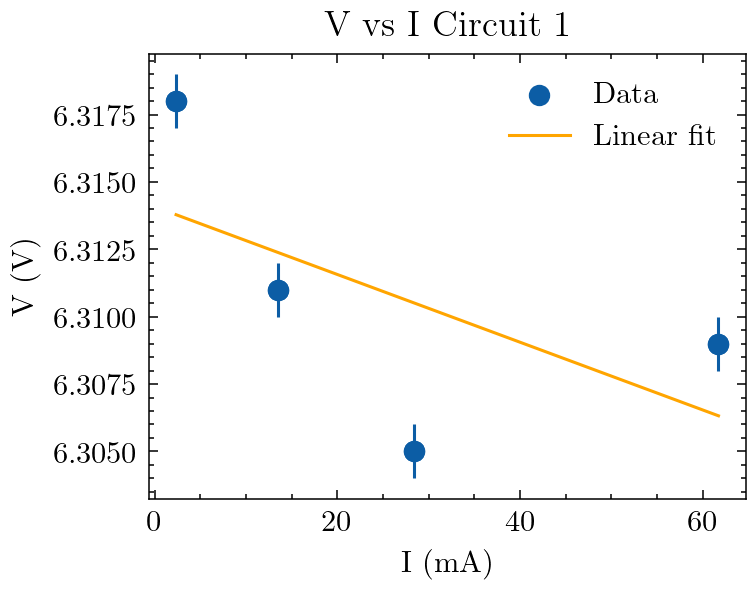

In [77]:
plt.figure()
plt.scatter(I, V, label='Data')
plt.plot(I, poly(I), color="orange", label='Linear fit')
plt.errorbar(I, V, xerr=dI, yerr=dV, fmt='o')
plt.xlabel('I (mA)')
plt.ylabel('V (V)')
plt.title('V vs I Circuit 1')
plt.legend()
plt.savefig('./img/V_vs_I.png')
plt.show()